In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
house = pd.read_excel('Historic_clean.xlsx')

In [3]:
#split the dependent variable and independent variable
house_X =  house.copy()
house_X.drop(['SalePrice'],axis=1,inplace=True)
house_y = house['SalePrice']

In [4]:
house_x= house_X.iloc[:,:].values

In [5]:
type(house_x)

numpy.ndarray

In [6]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,agebybuilt,agebyremodel,TotalGrBsmtSF,OA2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,5,5,2566,3310
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,31,31,2524,2984
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,7,6,2706,3476
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,91,36,2473,3115
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,8,8,3343,4529


In [7]:
house.drop(['Id'],axis=1,inplace=True)
house.drop(['MSSubClass'],axis=1,inplace=True)
house.drop(['Heating'],axis=1,inplace=True)
house.drop(['Functional'],axis=1,inplace=True)
house.drop(['RoofMatl'],axis=1,inplace=True)
house.drop(['MiscFeature'],axis=1,inplace=True)

In [8]:
house.shape

(1460, 75)

In [9]:
#split the dependent variable and independent variable
house_X =  house.copy()
house_X.drop(['SalePrice'],axis=1,inplace=True)
house_y = house['SalePrice']

In [10]:
house_x= house_X.iloc[:,:].values

In [11]:
house.head(1)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,agebybuilt,agebyremodel,TotalGrBsmtSF,OA2
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,5,5,2566,3310


In [12]:
list(house_x[1,:])

['RL',
 80.0,
 9600,
 'Pave',
 nan,
 'Reg',
 'Lvl',
 'AllPub',
 'FR2',
 'Gtl',
 'Veenker',
 'Feedr',
 'Norm',
 '1Fam',
 '1Story',
 6,
 1976,
 1976,
 'Gable',
 'MetalSd',
 'MetalSd',
 nan,
 0,
 'TA',
 'TA',
 'CBlock',
 'Gd',
 'TA',
 'Gd',
 'ALQ',
 978,
 'Unf',
 284,
 1262,
 'Ex',
 'Y',
 'SBrkr',
 1262,
 0,
 1262,
 1262,
 2240,
 0,
 2.0,
 2.5,
 3,
 1,
 'TA',
 7,
 6,
 1,
 'TA',
 'Attchd',
 1976,
 'RFn',
 2,
 'TA',
 'TA',
 'Y',
 298,
 0,
 0,
 0,
 nan,
 nan,
 0,
 5,
 2007,
 'WD',
 'Normal',
 31,
 31,
 2524,
 2984]

In [13]:
#list all the categorical variables
columns_ohe = [0,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23,24,25,26,27,28,29,31,34,35,36,47,51,52,54,56,57,58,63,64,68,69]

In [14]:
list(house_x[1,[0,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23,24,25,26,27,28,29,31,34,35,36,47,51,52,54,56,57,58,63,64,68,69]])

['RL',
 'Pave',
 nan,
 'Reg',
 'Lvl',
 'AllPub',
 'FR2',
 'Gtl',
 'Veenker',
 'Feedr',
 'Norm',
 '1Fam',
 '1Story',
 'Gable',
 'MetalSd',
 'MetalSd',
 nan,
 'TA',
 'TA',
 'CBlock',
 'Gd',
 'TA',
 'Gd',
 'ALQ',
 'Unf',
 'Ex',
 'Y',
 'SBrkr',
 'TA',
 'TA',
 'Attchd',
 'RFn',
 'TA',
 'TA',
 'Y',
 nan,
 nan,
 'WD',
 'Normal']

In [15]:
for num in tqdm(columns_ohe):
    dummy_ = pd.get_dummies(house_x[:,num],sparse=True)
    if(num!=0):
        dummy = np.concatenate((dummy,dummy_),axis=1)
    else:
        dummy = dummy_

100%|██████████| 39/39 [00:00<00:00, 1097.35it/s]


In [16]:
dupe = np.delete(house_x,columns_ohe,1)

In [17]:
dupe = np.concatenate((dupe,dummy),axis=1)

In [18]:
list(dupe[1,:])

[80.0,
 9600,
 6,
 1976,
 1976,
 0,
 978,
 284,
 1262,
 1262,
 0,
 1262,
 1262,
 2240,
 0,
 2.0,
 2.5,
 3,
 1,
 7,
 6,
 1,
 1976,
 2,
 298,
 0,
 0,
 0,
 0,
 5,
 2007,
 31,
 31,
 2524,
 2984,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,

In [19]:
house_x = np.delete(house_x,columns_ohe,1)

In [20]:
house_x = np.concatenate((house_x,dummy),axis=1)

In [21]:
list(house_x[1,:])

[80.0,
 9600,
 6,
 1976,
 1976,
 0,
 978,
 284,
 1262,
 1262,
 0,
 1262,
 1262,
 2240,
 0,
 2.0,
 2.5,
 3,
 1,
 7,
 6,
 1,
 1976,
 2,
 298,
 0,
 0,
 0,
 0,
 5,
 2007,
 31,
 31,
 2524,
 2984,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,

In [22]:
np.random.seed(0)
number_of_samples = len(house_x)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.80)
house_x_train = house_x[random_indices[:num_training_samples]]
house_y_train=house_y[random_indices[:num_training_samples]]
house_x_validation=house_x[random_indices[num_training_samples:]]
house_y_validation=house_y[random_indices[num_training_samples:]]

In [23]:
len(house_x_train)

1168

In [24]:
len(house_y_train)

1168

In [25]:
len(house_x_validation)

292

In [26]:
len(house_y_validation)

292

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(house_x_train)
# Apply transform to both thvfe training set and the test set.
house_x_train = scaler.transform(house_x_train)
house_x_validation = scaler.transform(house_x_validation)

In [28]:
house_x_train.shape

(1168, 261)

In [29]:
house_x_validation.shape

(292, 261)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(house_x_train, house_y_train)
house_linear_train_predicted = model.predict(house_x_train)
house_linear_validation_predicted = model.predict(house_x_validation)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(house_y_train, house_linear_train_predicted)

0.9196492012971479

In [32]:
r2_score(house_y_validation, house_linear_validation_predicted)

-2.3987548315823172e+23

Training data -Mean squared error: 531885532.08
Validation data - Mean squared error: 1181483426254214872664229736873984.00
Training data Coefficient of determination: 0.92
Validation data Coefficient of determination: -239875483158231717511168.00


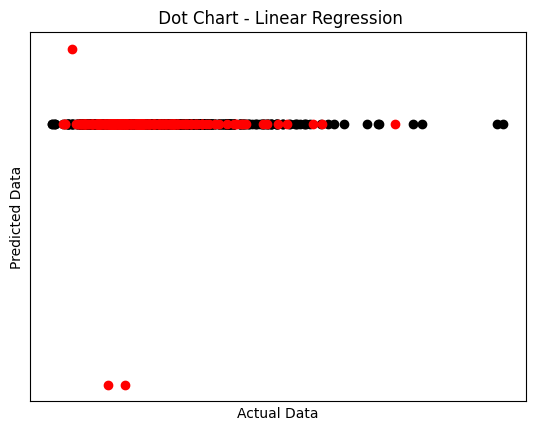

In [33]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, house_linear_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, house_linear_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, house_linear_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, house_linear_validation_predicted))

# Plot outputs
plt.scatter(house_y_train, house_linear_train_predicted, color="black")
plt.scatter(house_y_validation, house_linear_validation_predicted, color="red")

#plt.plot(cars_y_validation, cars_linear_validation_predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart - Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor

decision = DecisionTreeRegressor(random_state=0)
decision.fit(house_x_train, house_y_train)
decision_train_predicted = decision.predict(house_x_train)
decision_validation_predicted = decision.predict(house_x_validation)

In [35]:
r2_score(house_y_train, decision_train_predicted)

1.0

In [36]:
r2_score(house_y_validation, decision_validation_predicted)

0.7528306696382971

Training data -Mean squared error: 0.00
Validation data - Mean squared error: 1217408563.21
Training data Coefficient of determination: 1.00
Validation data Coefficient of determination: 0.75


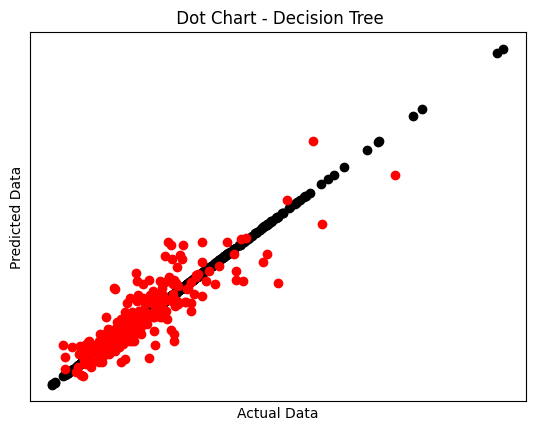

In [37]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, decision_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, decision_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, decision_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, decision_validation_predicted))

# Plot outputs


plt.scatter(house_y_train, decision_train_predicted, color="black")
plt.scatter(house_y_validation, decision_validation_predicted, color="red")


#plt.plot

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart - Decision Tree")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(house_x_train, house_y_train)

#model evaluation
ridge_train_predicted = ridge.predict(house_x_train)
ridge_validation_predicted = ridge.predict(house_x_validation)

In [39]:
r2_score(house_y_train, ridge_train_predicted)

0.9199566994577546

In [40]:
r2_score(house_y_validation, ridge_validation_predicted)

0.8491786616421455

Training data -Mean squared error: 529850034.91
Validation data - Mean squared error: 742855873.59
Training data Coefficient of determination: 0.92
Validation data Coefficient of determination: 0.85


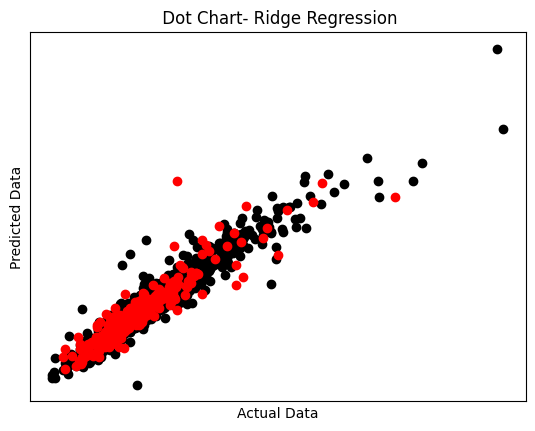

In [41]:
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, ridge_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation,ridge_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, ridge_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, ridge_validation_predicted))

# Plot outputs


plt.scatter(house_y_train, ridge_train_predicted, color="black")
plt.scatter(house_y_validation, ridge_validation_predicted, color="red")


#plt.plot

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart- Ridge Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

In [42]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(house_x_train, house_y_train)
random_train_predicted = regressor.predict(house_x_train)
random_validation_predicted = regressor.predict(house_x_validation)

In [43]:
r2_score(house_y_train, random_train_predicted)

0.9793107053290868

In [44]:
r2_score(house_y_validation, random_validation_predicted)

0.8958173307791701

Training data -Mean squared error: 136953666.70
Validation data - Mean squared error: 513141632.34
Training data Coefficient of determination: 0.98
Validation data Coefficient of determination: 0.90


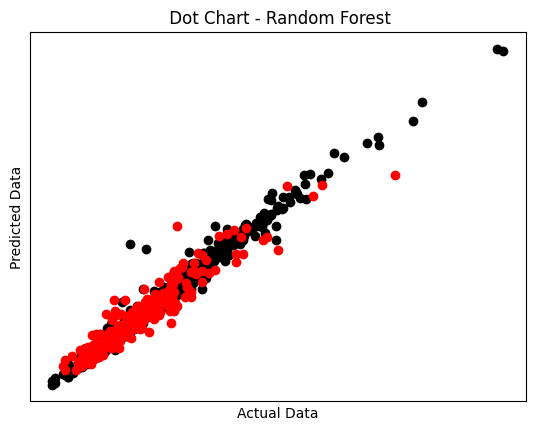

In [45]:
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, random_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation,random_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, random_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, random_validation_predicted))

# Plot outputs


plt.scatter(house_y_train, random_train_predicted, color="black")
plt.scatter(house_y_validation, random_validation_predicted, color="red")


#plt.plot

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart - Random Forest")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()